In [37]:
# SCF.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

machine = pd.read_excel('SCF1.xlsx')
machine.head()

pd.read_excel('SCF1.xlsx')
machine

,20.1 Order Type (AUART),20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST),20.15 Value Categories Description (KTEXT - TPIR2T),20.2 Short Text (TXT),20.3 Order Number (AUFNR),20.4 Description (KTEXT),20.5 System_Status,20.6 User_Status,210.1 Basic Start Date (GSTRP),210.7 Actual Finish Date (GETRI),...,500.16 Manufacturer serial number (SERGE),500.19 Text for Object Type (EARTX),500.8 Acquisition date (CC_ANSDT_format),500.9 Acquisition date (ANSDT),520.3 Cost Center (KOSTL),530.1 Functional Location (TPLNR),530.2 Technical identification number (TIDNR),Activity Number (VORNR),Operation short text (LTXA1),40.9 Actual work (ISMNW)
0,PM01,0.0,Goods and Services,Breakdown,4.000007e+09,Gastroscope image blurry,CNF SETC SSAP PRC CLSD MSCP MACM PRT,PLAN,2015-02-17,2015-02-18,...,3G314A116,Scopes - Fibre Optic,2010-02-01,20100201,A02012001,MCSA-MCL-CGT-WRD-005,448686,10.0,Gastroscope image blurry,0.5
1,PM01,0.0,Goods and Services,Breakdown,4.000032e+09,Please repair fujfilm EC 530FL colonovid,CNF SETC SSAP PRC MANC CLSD PRT,CAWC,2016-07-26,2016-08-19,...,3C496A020,Scopes - Fibre Optic,2009-10-01,20091001,A02112001,MCSA-MCL-CON-TH1,381855,10.0,Please repair fujfilm EC 530FL colonovid,1.0
2,PM01,0.0,Goods and Services,Breakdown,4.000041e+09,Colonoscope in Main Theatre Ratchet,CNF SETC SSAP PRC MANC CLSD PPRT GMPS,IPRO,2016-09-05,2016-09-12,...,3C654A114,Scopes - Fibre Optic,2011-02-04,20110204,A02112001,MCSA-MCL-CON-TH1-014,546579,10.0,Colonoscope in Main Theatre Ratchet,0.5
3,PM01,0.0,Goods and Services,Breakdown,4.000050e+09,Bronchoscope in theatre physically damag,CNF SETC SSAP PRC MANC CLSD PRT,IPRO,2016-09-21,2016-10-18,...,#2140831,Scopes - Fibre Optic,2011-07-07,20110707,A01912001,MCSA-MCL-WDG-TH1-002,521579,10.0,Broncoscope in theatre physcaly damaged,0.5
4,PM01,0.0,Goods and Services,Breakdown,4.000053e+09,Repair gastroscope,CNF SETC SSAP PRC MANC CLSD PPRT,IPRO,2016-09-28,2016-10-18,...,2730910,Scopes - Fibre Optic,NaT,0,A01912001,MCSA-MCL-WDG-TH1-009,513181,10.0,Repair gastroscope,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,2253564,Scopes - Fibre Optic,NaT,0,A04212001,MCSA-MCL-HER-TH1,501854,NaN,NaN,NaN
13552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,2243098,Scopes - Fibre Optic,NaT,0,A04212001,MCSA-MCL-HER-TH1,501843,NaN,NaN,NaN
13553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,52170,Scopes - Fibre Optic,NaT,0,A05012001,MCSA-MCL-VGL-TH1,MC3227247,NaN,NaN,NaN
13554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,73989,Scopes - Fibre Optic,NaT,0,A03412001,MCSA-MCL-LPO-TH1,MC3199169,NaN,NaN,NaN


In [38]:
machine['500.8 Acquisition date (CC_ANSDT_format)'] = pd.to_datetime(
    machine['500.8 Acquisition date (CC_ANSDT_format)'], 
    format='%d/%m/%Y'  # Specify day/month/year format
)
machine['500.8 Acquisition date (CC_ANSDT_format)'] = pd.to_datetime(machine['500.8 Acquisition date (CC_ANSDT_format)'])

start_date = machine['500.8 Acquisition date (CC_ANSDT_format)'].min()
latest_date = machine['500.8 Acquisition date (CC_ANSDT_format)'].max()

print("Start Date (Earliest):", start_date)
print("Latest Date:", latest_date)

Start Date (Earliest): 1980-07-25 00:00:00
Latest Date: 2024-09-20 00:00:00


In [39]:
machine.isnull().sum()

20.1 Order Type (AUART)                                354
20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)              395
20.15 Value Categories Description (KTEXT - TPIR2T)    395
20.2 Short Text (TXT)                                  354
20.3 Order Number (AUFNR)                              354
20.4 Description (KTEXT)                               354
20.5 System_Status                                     354
20.6 User_Status                                       354
210.1 Basic Start Date (GSTRP)                         354
210.7 Actual Finish Date (GETRI)                       704
230.2 Maintenance plant description (NAME1)            354
40.28 Confirmation text (LTXA1)                        769
40.29 Actual work plus negative (CC_ISMNW)             677
50.2 Equipment Number (CC_EQUNR_Lead_Zeros_Trim)         0
50.4 Description of Technical Object (EQKTX)             0
50.9 Equipment category (EQTYP)                          0
500.10 Acquisition Value (ANSWT)                        

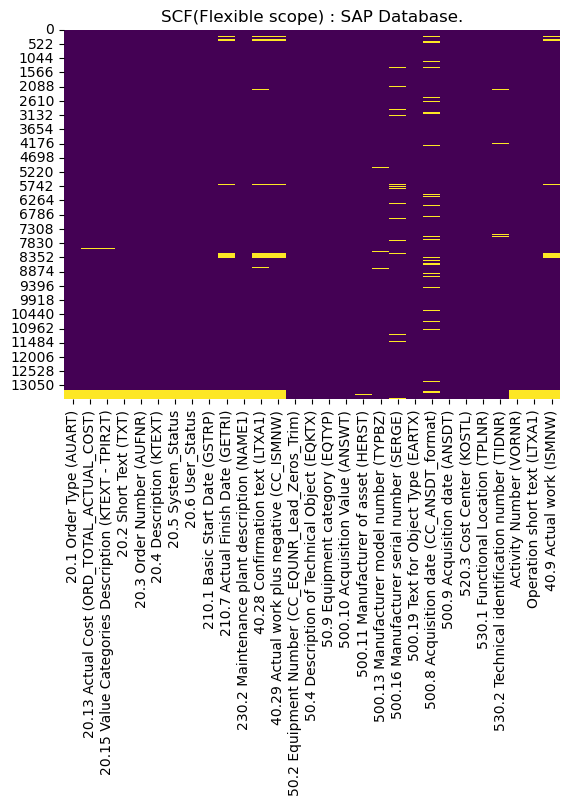

In [40]:
sns.heatmap(machine.isnull(), cbar=False, cmap='viridis')
plt.title('SCF(Flexible scope) : SAP Database.')
plt.show()

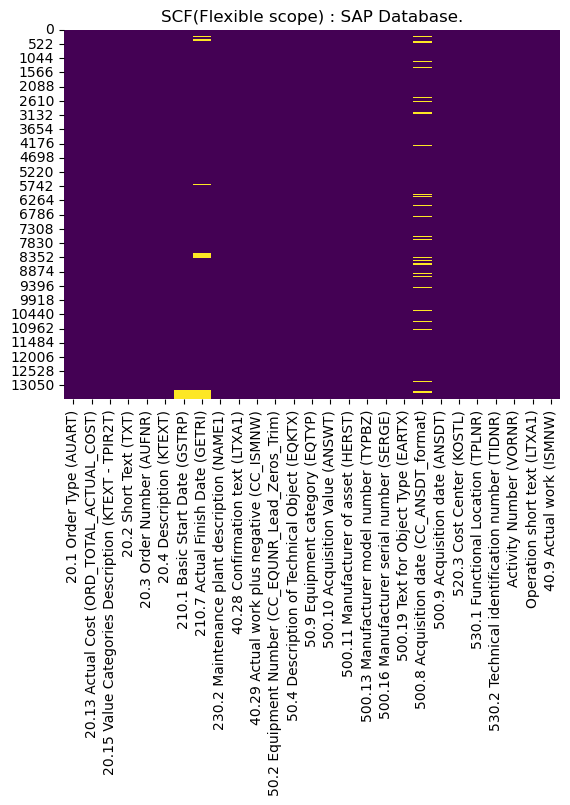

In [12]:
# Cleaning.

machine = machine.drop(['20.5 System_Status','20.6 User_Status'], axis=1)

numeric_cols = machine.select_dtypes(include='number').columns
machine[numeric_cols] = machine[numeric_cols].fillna(machine[numeric_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = machine.select_dtypes(include='object').columns
machine[categorical_cols] = machine[categorical_cols].fillna(machine[categorical_cols].mode().iloc[0])
machine.isnull().sum()

sns.heatmap(machine.isnull(), cbar=False, cmap='viridis')
plt.title('SCF(Flexible scope) : SAP Database.')
plt.show()

In [13]:
machine.isnull().sum()

20.1 Order Type (AUART)                                  0
20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)                0
20.15 Value Categories Description (KTEXT - TPIR2T)      0
20.2 Short Text (TXT)                                    0
20.3 Order Number (AUFNR)                                0
20.4 Description (KTEXT)                                 0
210.1 Basic Start Date (GSTRP)                         354
210.7 Actual Finish Date (GETRI)                       704
230.2 Maintenance plant description (NAME1)              0
40.28 Confirmation text (LTXA1)                          0
40.29 Actual work plus negative (CC_ISMNW)               0
50.2 Equipment Number (CC_EQUNR_Lead_Zeros_Trim)         0
50.4 Description of Technical Object (EQKTX)             0
50.9 Equipment category (EQTYP)                          0
500.10 Acquisition Value (ANSWT)                         0
500.11 Manufacturer of asset (HERST)                     0
500.13 Manufacturer model number (TYPBZ)                

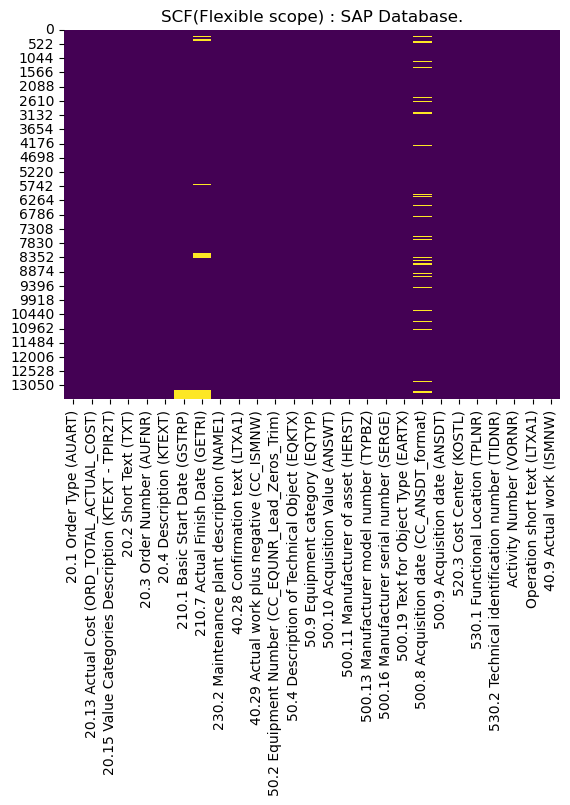

In [14]:
sns.heatmap(machine.isnull(), cbar=False, cmap='viridis')
plt.title('SCF(Flexible scope) : SAP Database.')
plt.show()

In [15]:
# Find columns that contain 'start' and 'finish' in their name

print([col for col in machine.columns if 'start' in col.lower()])
print([col for col in machine.columns if 'finish' in col.lower()])

machine.rename(columns={
    '210.1 Basic Start Date (GSTRP)': 'GSTRP',
    '210.7 Actual Finish Date (GETRI)': 'GETRI'
}, inplace=True)

# Now you can safely convert them to datetime
machine['GSTRP'] = pd.to_datetime(machine['GSTRP'], errors='coerce')
machine['GETRI'] = pd.to_datetime(machine['GETRI'], errors='coerce')

# Fill missing values (if needed)
machine['GSTRP'].fillna(pd.to_datetime('today'), inplace=True)
machine['GETRI'].fillna(pd.to_datetime('today'), inplace=True)

# Check for any remaining missing values
print(machine[['GSTRP', 'GETRI']].isna().sum())

machine.isnull().sum()

['210.1 Basic Start Date (GSTRP)']
['210.7 Actual Finish Date (GETRI)']
GSTRP    0
GETRI    0
dtype: int64


C:\Users\U0123902\AppData\Local\Temp\ipykernel_21672\2704069517.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  machine['GSTRP'].fillna(pd.to_datetime('today'), inplace=True)
C:\Users\U0123902\AppData\Local\Temp\ipykernel_21672\2704069517.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

20.1 Order Type (AUART)                                  0
20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)                0
20.15 Value Categories Description (KTEXT - TPIR2T)      0
20.2 Short Text (TXT)                                    0
20.3 Order Number (AUFNR)                                0
20.4 Description (KTEXT)                                 0
GSTRP                                                    0
GETRI                                                    0
230.2 Maintenance plant description (NAME1)              0
40.28 Confirmation text (LTXA1)                          0
40.29 Actual work plus negative (CC_ISMNW)               0
50.2 Equipment Number (CC_EQUNR_Lead_Zeros_Trim)         0
50.4 Description of Technical Object (EQKTX)             0
50.9 Equipment category (EQTYP)                          0
500.10 Acquisition Value (ANSWT)                         0
500.11 Manufacturer of asset (HERST)                     0
500.13 Manufacturer model number (TYPBZ)                

In [16]:
# Cleaning the date function.

# Fill NaT with a default date (e.g., '2000-01-01')
machine['500.8 Acquisition date (CC_ANSDT_format)'].fillna(pd.to_datetime('2000-01-01'), inplace=True)
# Drop rows where '500.8 Acquisition date (CC_ANSDT_format)' is NaT
machine.dropna(subset=['500.8 Acquisition date (CC_ANSDT_format)'], inplace=True)
# Filter rows where '500.8 Acquisition date (CC_ANSDT_format)' is NaT
missing_dates = machine[machine['500.8 Acquisition date (CC_ANSDT_format)'].isna()]
print(missing_dates)
# Check the unique values before conversion to understand problematic entries
print(machine['500.8 Acquisition date (CC_ANSDT_format)'].astype(str).unique())

machine.isnull().sum()

Empty DataFrame
Columns: [20.1 Order Type (AUART), 20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST), 20.15 Value Categories Description (KTEXT - TPIR2T), 20.2 Short Text (TXT), 20.3 Order Number (AUFNR), 20.4 Description (KTEXT), GSTRP, GETRI, 230.2 Maintenance plant description (NAME1), 40.28 Confirmation text (LTXA1), 40.29 Actual work plus negative (CC_ISMNW), 50.2 Equipment Number (CC_EQUNR_Lead_Zeros_Trim), 50.4 Description of Technical Object (EQKTX), 50.9 Equipment category (EQTYP), 500.10 Acquisition Value (ANSWT), 500.11 Manufacturer of asset (HERST), 500.13 Manufacturer model number (TYPBZ), 500.16 Manufacturer serial number (SERGE), 500.19 Text for Object Type (EARTX), 500.8 Acquisition date (CC_ANSDT_format), 500.9 Acquisition date (ANSDT), 520.3 Cost Center (KOSTL), 530.1 Functional Location (TPLNR), 530.2 Technical identification number (TIDNR), Activity Number (VORNR), Operation short text (LTXA1), 40.9 Actual work (ISMNW)]
Index: []

[0 rows x 27 columns]
['2010-02-01' '2009-1

C:\Users\U0123902\AppData\Local\Temp\ipykernel_21672\3841688011.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  machine['500.8 Acquisition date (CC_ANSDT_format)'].fillna(pd.to_datetime('2000-01-01'), inplace=True)


20.1 Order Type (AUART)                                0
20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)              0
20.15 Value Categories Description (KTEXT - TPIR2T)    0
20.2 Short Text (TXT)                                  0
20.3 Order Number (AUFNR)                              0
20.4 Description (KTEXT)                               0
GSTRP                                                  0
GETRI                                                  0
230.2 Maintenance plant description (NAME1)            0
40.28 Confirmation text (LTXA1)                        0
40.29 Actual work plus negative (CC_ISMNW)             0
50.2 Equipment Number (CC_EQUNR_Lead_Zeros_Trim)       0
50.4 Description of Technical Object (EQKTX)           0
50.9 Equipment category (EQTYP)                        0
500.10 Acquisition Value (ANSWT)                       0
500.11 Manufacturer of asset (HERST)                   0
500.13 Manufacturer model number (TYPBZ)               0
500.16 Manufacturer serial numb

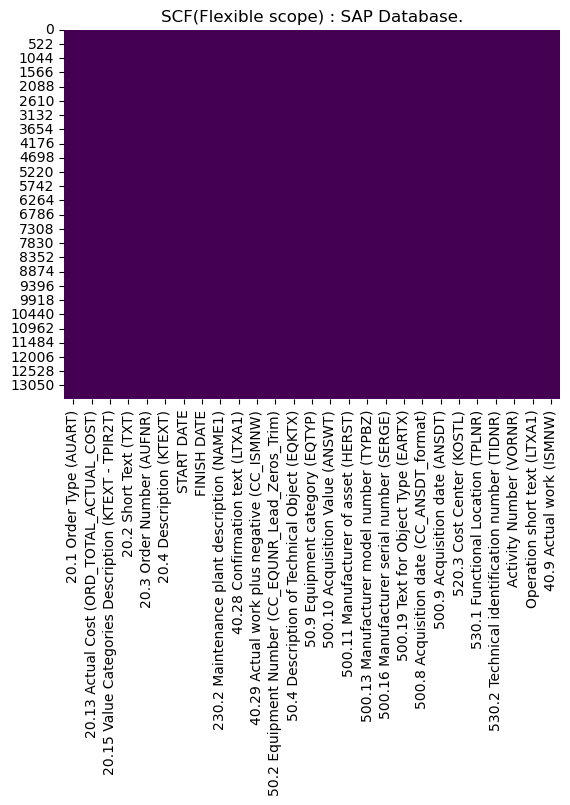

In [17]:
machine.rename(columns={
    'GSTRP': 'START DATE',
    'GETRI': 'FINISH DATE'
}, inplace=True)

sns.heatmap(machine.isnull(), cbar=False, cmap='viridis')
plt.title('SCF(Flexible scope) : SAP Database.')
plt.show()

In [18]:
# EDA.

machine.describe()

,20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST),20.3 Order Number (AUFNR),START DATE,FINISH DATE,40.29 Actual work plus negative (CC_ISMNW),50.2 Equipment Number (CC_EQUNR_Lead_Zeros_Trim),500.10 Acquisition Value (ANSWT),500.8 Acquisition date (CC_ANSDT_format),500.9 Acquisition date (ANSDT),Activity Number (VORNR),40.9 Actual work (ISMNW)
count,13556.000000,1.355600e+04,13556,13556,13556.000000,1.355600e+04,1.355600e+04,13556,1.355600e+04,13556.000000,13556.000000
mean,10594.094875,4.001874e+09,2021-06-04 00:31:06.171311872,2021-07-15 04:06:34.376149248,1.266729,1.022502e+07,2.008160e+05,2014-04-06 00:17:50.758335744,1.879701e+07,11.698228,1.288454
min,0.000000,4.000006e+09,2015-01-24 00:00:00,2015-01-21 00:00:00,-30.000000,1.000925e+07,0.000000e+00,1980-07-25 00:00:00,0.000000e+00,10.000000,0.000000
25%,118.660000,4.001086e+09,2019-05-29 00:00:00,2019-07-19 00:00:00,0.500000,1.011020e+07,1.206248e+05,2011-12-13 00:00:00,2.011121e+07,10.000000,0.500000
50%,250.800000,4.001893e+09,2021-09-04 00:00:00,2021-10-08 00:00:00,0.800000,1.019883e+07,1.888967e+05,2015-07-03 00:00:00,2.015070e+07,10.000000,0.800000
75%,2470.000000,4.002746e+09,2023-07-03 00:00:00,2023-08-22 00:00:00,1.000000,1.035268e+07,2.860825e+05,2017-04-24 00:00:00,2.017042e+07,10.000000,1.000000
max,625078.740000,4.003391e+09,2025-01-23 08:19:31.238142,2025-01-23 08:19:31.254373,55.200000,1.047872e+07,1.520592e+06,2024-09-20 00:00:00,2.024092e+07,100.000000,55.200000
std,33308.578681,9.634465e+05,NaN,NaN,3.865598,1.320660e+05,1.340818e+05,NaN,5.039703e+06,6.954167,3.858770


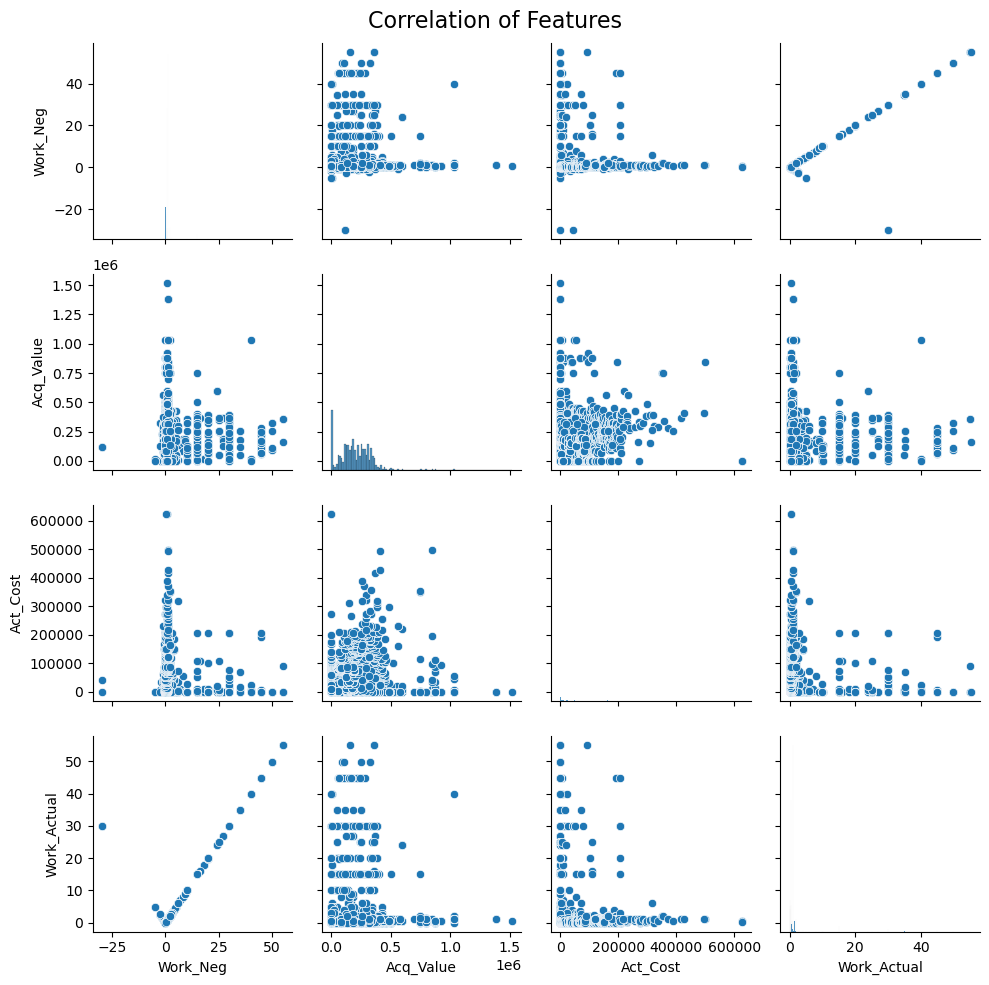

In [47]:
machine = machine.rename(columns={
    '40.29 Actual work plus negative (CC_ISMNW)': 'Work_Neg',
    '500.10 Acquisition Value (ANSWT)': 'Acq_Value',
    '20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)': 'Act_Cost',
    '40.9 Actual work (ISMNW)': 'Work_Actual'
})

# Create the pairplot
sns.pairplot(machine[['Work_Neg', 'Acq_Value', 'Act_Cost', 'Work_Actual']])

# Set the title
plt.suptitle('Correlation of Features', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

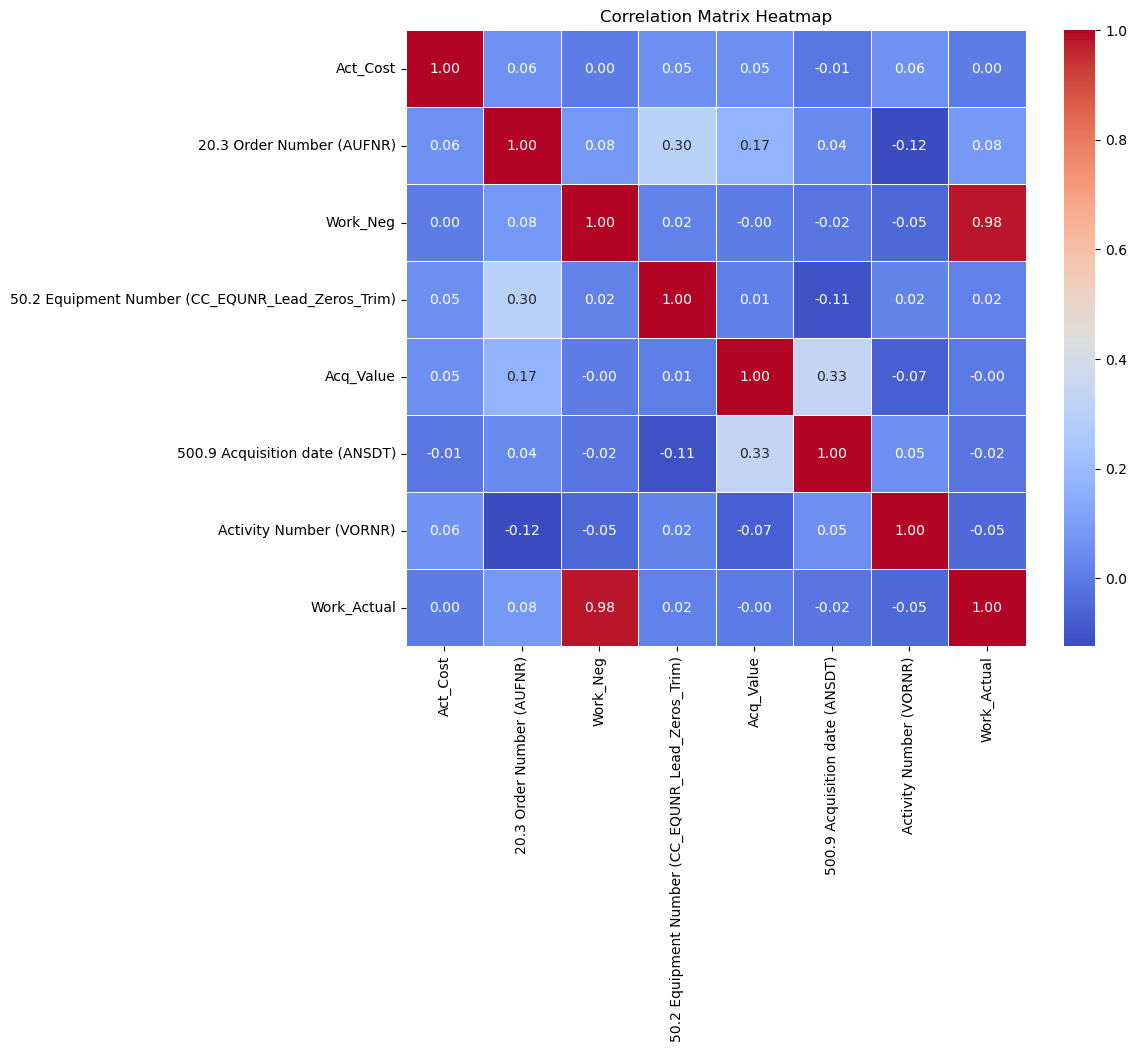

In [48]:
# Relationship.

# Select only numeric columns for correlation calculation
numeric_cols = machine.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_cols.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

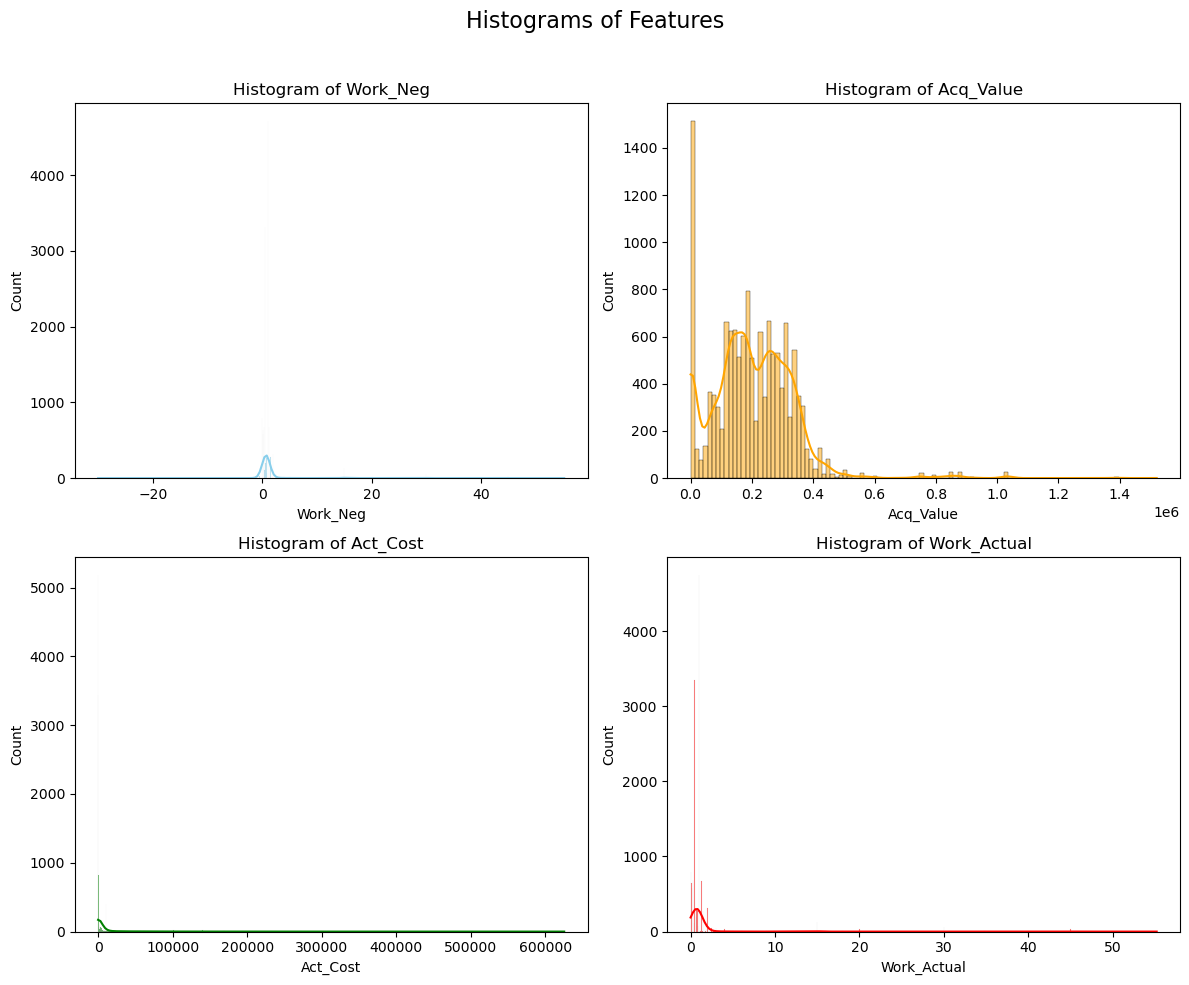

In [35]:
# Rename columns
machine = machine.rename(columns={
    '40.29 Actual work plus negative (CC_ISMNW)': 'Work_Neg',
    '500.10 Acquisition Value (ANSWT)': 'Acq_Value',
    '20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)': 'Act_Cost',
    '40.9 Actual work (ISMNW)': 'Work_Actual'
})

# Set up the number of rows and columns for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create histograms for each column
sns.histplot(machine['Work_Neg'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram of Work_Neg')

sns.histplot(machine['Acq_Value'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Histogram of Acq_Value')

sns.histplot(machine['Act_Cost'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Histogram of Act_Cost')

sns.histplot(machine['Work_Actual'], kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Histogram of Work_Actual')

# Set the title
plt.suptitle('Histograms of Features', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.show()

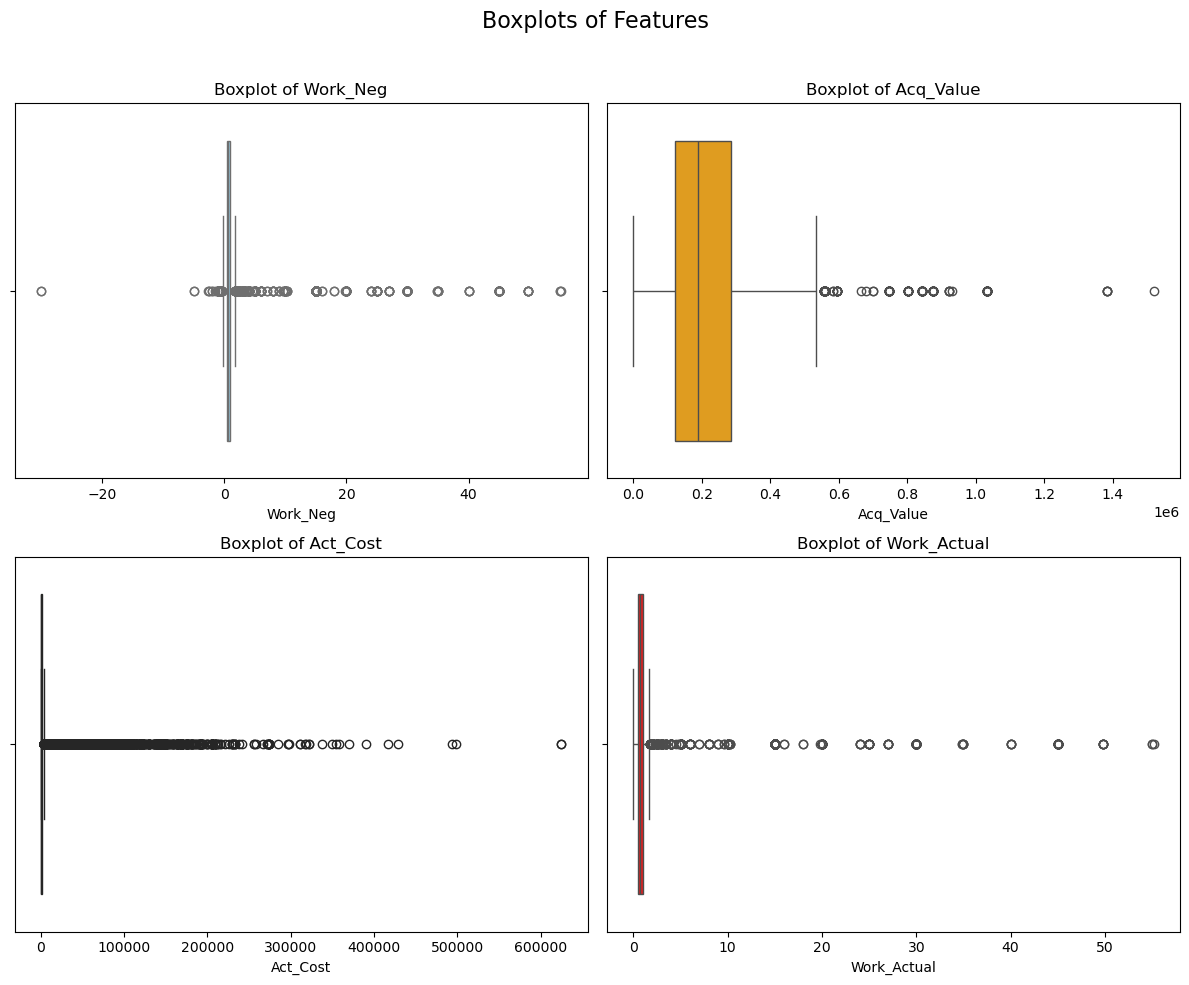

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns
machine = machine.rename(columns={
    '40.29 Actual work plus negative (CC_ISMNW)': 'Work_Neg',
    '500.10 Acquisition Value (ANSWT)': 'Acq_Value',
    '20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)': 'Act_Cost',
    '40.9 Actual work (ISMNW)': 'Work_Actual'
})

# Set up the number of rows and columns for the boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create boxplots for each column
sns.boxplot(x=machine['Work_Neg'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Boxplot of Work_Neg')

sns.boxplot(x=machine['Acq_Value'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Boxplot of Acq_Value')

sns.boxplot(x=machine['Act_Cost'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Boxplot of Act_Cost')

sns.boxplot(x=machine['Work_Actual'], ax=axes[1, 1], color='red')
axes[1, 1].set_title('Boxplot of Work_Actual')

# Set the title
plt.suptitle('Boxplots of Features', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.show()

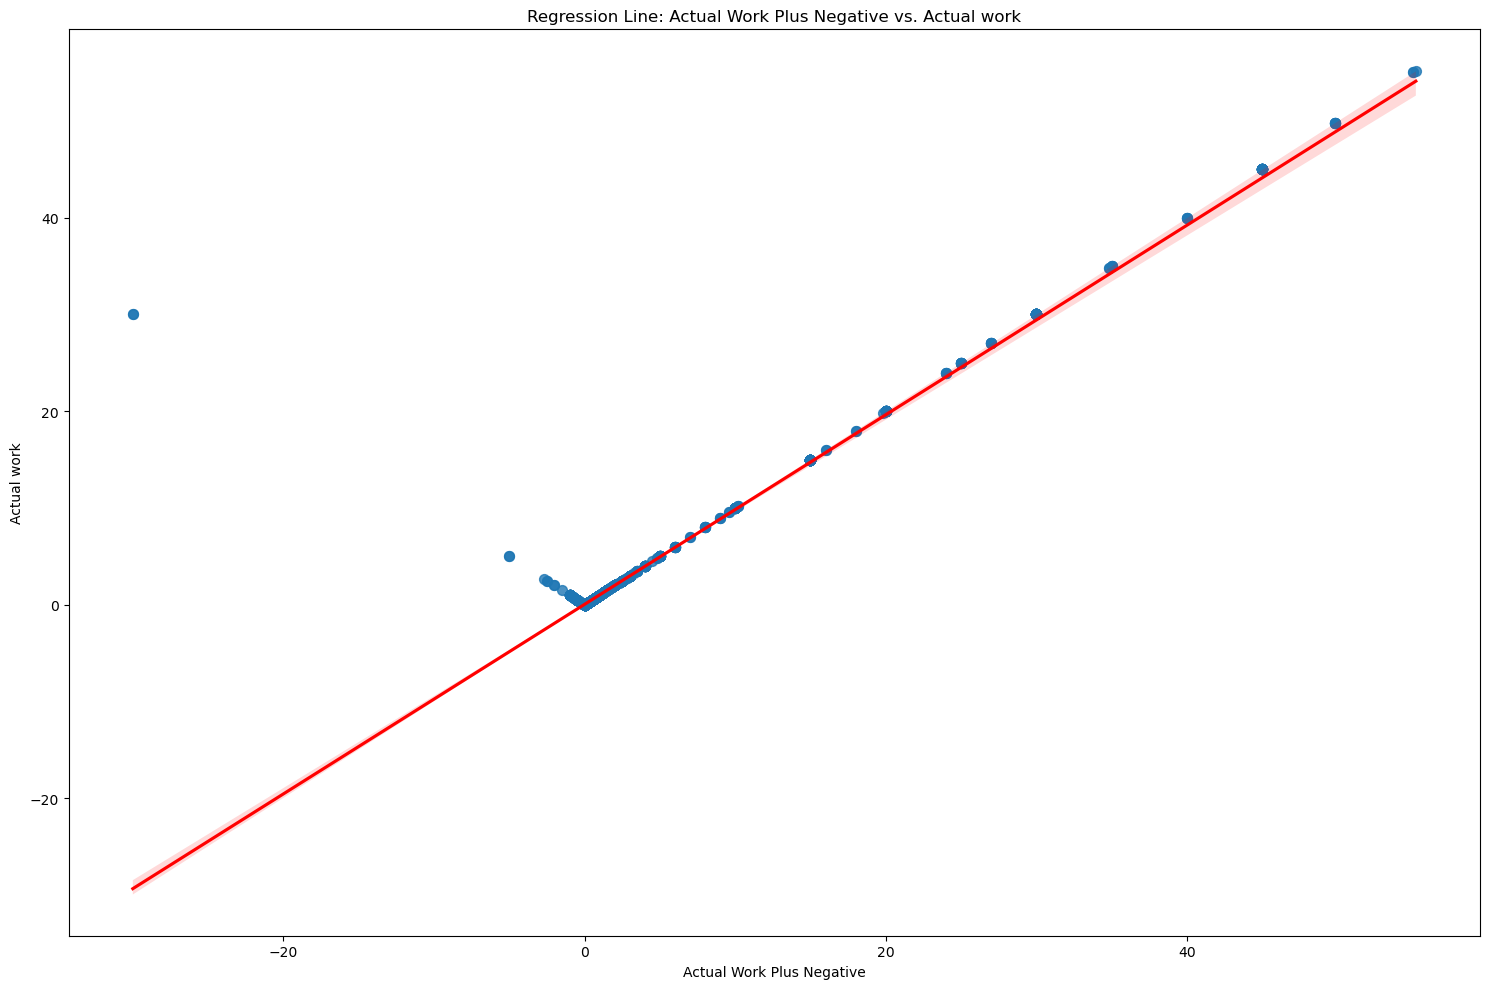

In [29]:
# Add regression lines for pairwise relationships between the variables
plt.figure(figsize=(15, 10))

# # Plot regression lines for each pair of variables
sns.regplot(x='40.29 Actual work plus negative (CC_ISMNW)', 
            y='40.9 Actual work (ISMNW)', data=machine, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Line: Actual Work Plus Negative vs. Actual work')
plt.xlabel('Actual Work Plus Negative')
plt.ylabel('Actual work')
plt.tight_layout()
plt.show()

# # Plotting another pair
# plt.figure(figsize=(15, 10))
# sns.regplot(x='40.29 Actual work plus negative (CC_ISMNW)', 
#             y='40.9 Actual work (ISMNW)', data=machine, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
# plt.title('Regression Line: Actual Work Plus Negative vs. Actual Work')
# plt.xlabel('Actual Work Plus Negative')
# plt.ylabel('Actual Work')
# plt.tight_layout()
# plt.show()

# You can add more regression plots as needed between other pairs of columns.

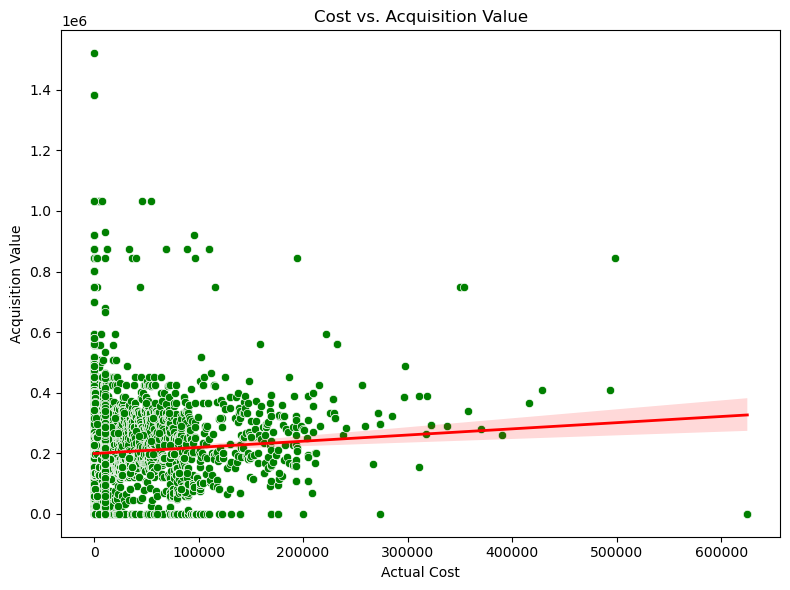

In [31]:
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x='20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)', 
                y='500.10 Acquisition Value (ANSWT)', data=machine, color='green')

# Regression line
sns.regplot(x='20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)', 
            y='500.10 Acquisition Value (ANSWT)', data=machine, 
            scatter=False, color='blue', line_kws={"color": "red", "lw": 2})

plt.title('Cost vs. Acquisition Value')
plt.xlabel('Actual Cost')
plt.ylabel('Acquisition Value')
plt.tight_layout()
plt.show()

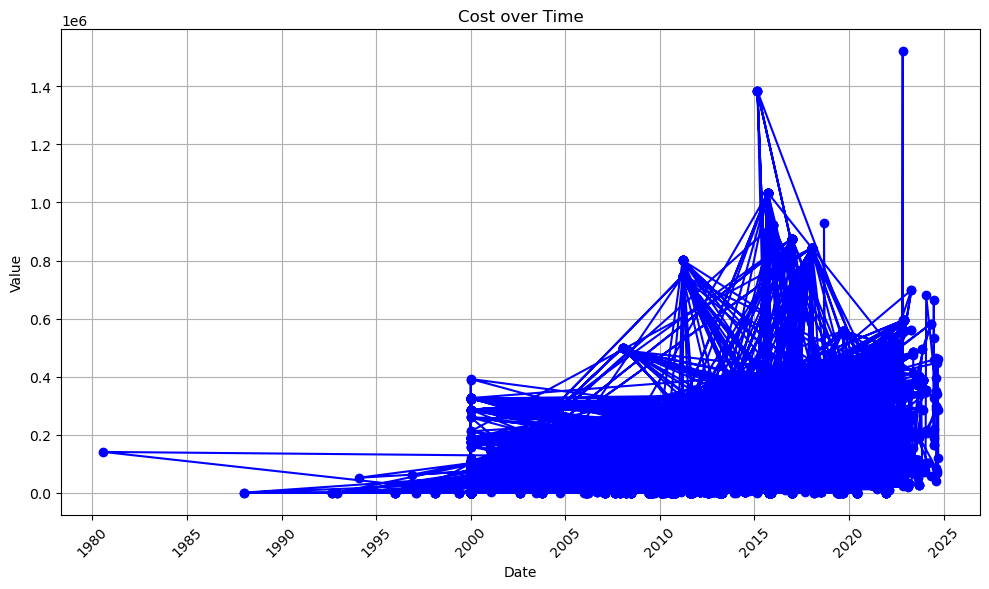

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(machine['500.8 Acquisition date (CC_ANSDT_format)'], machine['500.10 Acquisition Value (ANSWT)'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Cost over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

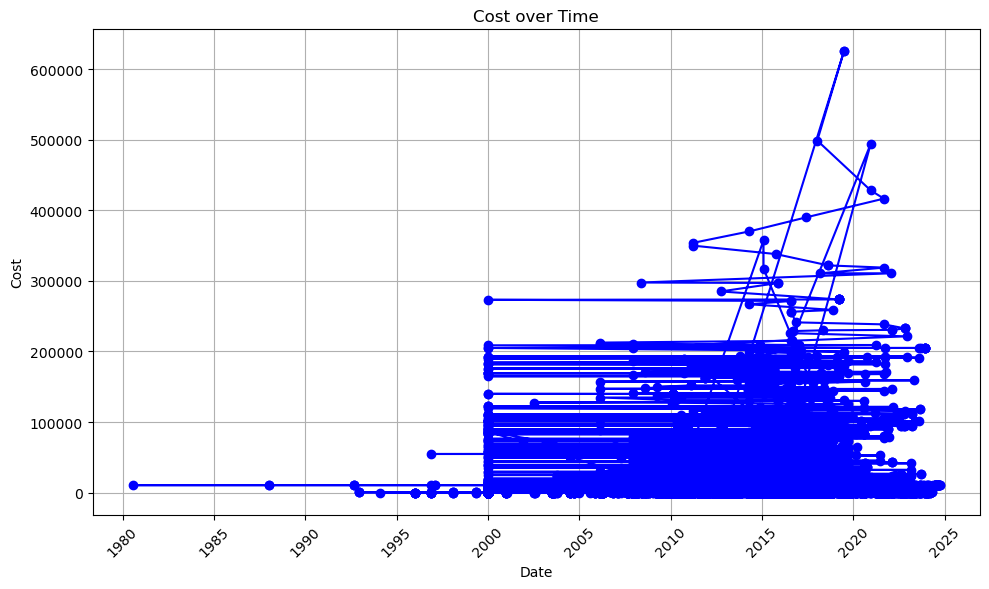

In [22]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(machine['500.8 Acquisition date (CC_ANSDT_format)'], machine['20.13 Actual Cost (ORD_TOTAL_ACTUAL_COST)'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Cost over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering & Model Development.

### Business question to answer.

* Replace or repair equipment?
* Business needs a way of identifying equipment that may need replacement and with a short investigation decide on replacement or repair of it.
* This is a Classification task, Repair or Replace.

### Problem Definition

* To create a model that analyzes when to replace or repair equipment, we can approach the problem as a classification task, where the goal is to classify equipment into two categories: "Replace" or "Repair". 
* This type of model can help decision-makers understand whether equipment should be replaced or repaired based on various features such as costs, work done, equipment category, etc.

* The target variable for this classification task could be a binary label indicating whether the equipment should be replaced or repaired. 
* We will need to define a rule or threshold for categorizing equipment as "Replace" or "Repair". For instance:

* If the Acquisition Value (Acq_Value) or Work Cost (Act_Cost) exceeds a certain threshold, it may be more cost-effective to replace the equipment.
* If the Work_Neg (indicating negative work or damage) is significant, that could indicate a need for replacement.
* Work_Actual and Equipment Category (EQTYP) could also be important indicators of the repairability of the equipment.

### Choose Classification Model

* For this type of binary classification problem, we can use several models, such as:

* Logistic Regression: A simple model suitable for binary classification.
* Decision Trees: They can handle both numerical and categorical data and provide interpretable rules.
* Random Forest: An ensemble method that combines multiple decision trees for better performance.

In [51]:
from IPython.display import display, Math

# Model 1: Logistic Regression
display(Math(r'\textbf{Model 1: Logistic Regression}'))
display(Math(r'p(y=1 | x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}'))

# Display Model 2: Decision Trees
display(Math(r'\textbf{Model 2: Decision Trees}'))
display(Math(r'y = f(x) + \epsilon'))

# RF.
display(Math(r'\textbf{Model 3:  Random Forest}'))
display(Math(r'y = \frac{1}{N} \sum_{i=1}^{N} f_i(x) + \epsilon'))

# SVM
display(Math(r'\textbf{Model 4: Support Vector Machine (SVM)}'))
display(Math(r'f(x) = \text{sgn}(w^T x + b)'))

# KNN.
display(Math(r'\textbf{Model 5: k-Nearest Neighbors (k-NN)}'))
display(Math(r'y = \text{mode}(y_1, y_2, \dots, y_k)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 1. Logistic Regression model.

In [ ]:
# Feature Engineering: Create the target variable (Replace_or_Repair) based on the rules.

# A threshold is simply a cutoff value or point that we use to make a decision or classification.

# In the context of the model I suggested, we need to define a rule or threshold to decide when equipment should be categorized as "Replace" or "Repair".
# For example, let's say we look at the cost of repairing (represented by Act_Cost), and we say:

# If the repair cost (Act_Cost) is greater than $20,000, then it's more cost-effective to Replace the equipment.
# If the repair cost (Act_Cost) is less than $20,000, we should Repair the equipment.
# In this case, $20,000 is the threshold. It’s the value that helps us decide whether to replace or repair based on the cost of repair. 
# This threshold is an arbitrary decision we make, often based on business rules or cost-benefit analysis.

# Simplified Example:
# If Act_Cost is $25,000, we would choose to Replace (because it exceeds the threshold of $20,000).
# If Act_Cost is $15,000, we would choose to Repair (because it’s below the threshold of $20,000).

In [75]:
# Feature Engineering.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Handle Date Features
# Convert date columns to datetime format
machine['GSTRP'] = pd.to_datetime(machine['210.1 Basic Start Date (GSTRP)'], errors='coerce')
machine['GETRI'] = pd.to_datetime(machine['210.7 Actual Finish Date (GETRI)'], errors='coerce')
machine['Acquisition_date'] = pd.to_datetime(machine['500.9 Acquisition date (ANSDT)'], errors='coerce')

# Calculate Age_of_Equipment (difference between finish date and start date)
machine['Age_of_Equipment'] = (machine['GETRI'] - machine['GSTRP']).dt.days

# Calculate Duration (difference between acquisition date and finish date)
machine['Duration'] = (machine['GETRI'] - machine['Acquisition_date']).dt.days

# Step 2: Create Ratio Features
# Work_Neg to Work_Actual ratio (add 1 to avoid division by zero)
machine['Work_Neg_to_Actual_Ratio'] = machine['Work_Neg'] / (machine['Work_Actual'] + 1)

# Step 3: Interaction Features
# Interaction feature between Act_Cost and Acq_Value
machine['Act_Cost_to_Acq_Value'] = machine['Act_Cost'] / (machine['Acq_Value'] + 1)

# Step 4: Handling Categorical Features (One-Hot Encoding)
categorical_cols = ['50.9 Equipment category (EQTYP)', '500.11 Manufacturer of asset (HERST)', '500.13 Manufacturer model number (TYPBZ)']
machine = pd.get_dummies(machine, columns=categorical_cols, drop_first=True)

# Step 5: Threshold-based Features
# Create binary features for High_Act_Cost and High_Work_Neg
machine['High_Act_Cost'] = (machine['Act_Cost'] > 10000).astype(int)  # Set a threshold for Act_Cost
machine['High_Work_Neg'] = (machine['Work_Neg'] > 1000).astype(int)    # Set a threshold for Work_Neg

# Step 6: Target Variable (Re - Replace or Repair)
# Let's define the target variable 'Re' based on some threshold conditions (for example, high cost or work issues)
# In this case, if 'Act_Cost' is greater than 15000 or if 'Work_Neg' is greater than 2000, we replace the equipment
machine['Re'] = ((machine['Act_Cost'] > 15000) | (machine['Work_Neg'] > 2000)).astype(int)

# Step 7: Scaling Numerical Features
# List of numerical columns to scale
numerical_cols = ['Act_Cost', 'Work_Neg', 'Work_Actual', 'Acq_Value', 'Age_of_Equipment', 'Duration', 'Work_Neg_to_Actual_Ratio', 'Act_Cost_to_Acq_Value']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
machine[numerical_cols] = scaler.fit_transform(machine[numerical_cols])

# Step 8: Final Dataset Check
print(machine.head())

In [79]:
# Model development

# Convert datetime columns to numeric features (e.g., number of days since a reference date)
datetime_cols = machine.select_dtypes(include=['datetime']).columns.tolist()

for col in datetime_cols:
    machine[col] = (machine[col] - machine[col].min()).dt.days  # Days since the earliest date in that column

# Drop datetime columns from the dataset
machine = machine.drop(columns=datetime_cols)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'machine' is your DataFrame

# Convert datetime columns to numeric if needed
datetime_cols = machine.select_dtypes(include=['datetime']).columns.tolist()
for col in datetime_cols:
    machine[col] = (machine[col] - machine[col].min()).dt.days  # Example: convert to days since the earliest date

# Step 1: Define Features (X) and Target (y)
X = machine.drop(columns=['Re'])  # Features (all columns except 'Re')
y = machine['Re']  # Target variable (Re)

# Identify categorical columns
categorical_cols = machine.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding to categorical features
machine_encoded = pd.get_dummies(machine, columns=categorical_cols, drop_first=True)

# Check if the encoding was successful
print(machine_encoded.head())

# Now, split the data into features (X) and target (y)
X = machine_encoded.drop('Re', axis=1)  # Drop the target column
y = machine_encoded['Re']  # Target column

   Act_Cost  20.3 Order Number (AUFNR)  210.1 Basic Start Date (GSTRP)  \
0 -0.313402               4.000007e+09                            24.0   
1 -0.313402               4.000032e+09                           549.0   
2 -0.313402               4.000041e+09                           590.0   
3 -0.313402               4.000050e+09                           606.0   
4 -0.313402               4.000053e+09                           613.0   

   210.7 Actual Finish Date (GETRI)  Work_Neg  \
0                              28.0 -0.193338   
1                             576.0 -0.067258   
2                             600.0 -0.193338   
3                             636.0 -0.193338   
4                             636.0 -0.193338   

   50.2 Equipment Number (CC_EQUNR_Lead_Zeros_Trim)  Acq_Value  \
0                                          10009900  -0.605780   
1                                          10121295  -0.581894   
2                                          10121298  -0.590378

In [82]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can also choose median or most_frequent)
imputer = SimpleImputer(strategy='mean')  # You can change strategy as needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, fit the model with the imputed data
model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = model.predict(X_test_imputed)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2388
           1       0.00      0.00      0.00       324

    accuracy                           0.88      2712
   macro avg       0.44      0.50      0.47      2712
weighted avg       0.78      0.88      0.82      2712

[[2388    0]
 [ 324    0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2388
           1       0.00      0.00      0.00       324

    accuracy                           0.88      2712
   macro avg       0.44      0.50      0.47      2712
weighted avg       0.78      0.88      0.82      2712



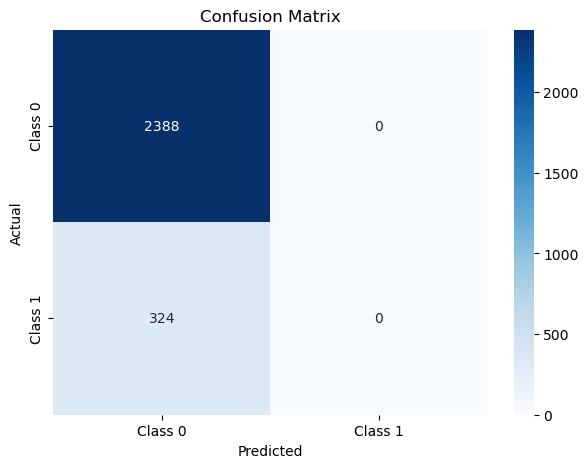

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming y_pred and y_test are already defined

# 1. Classification Report
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

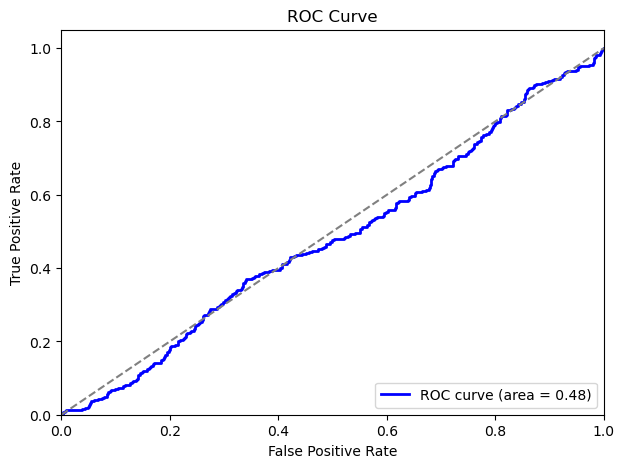

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [90]:
# 3. ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_imputed)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Model 1: Logistic Regression
display(Math(r'\textbf{Model 1: Logistic Regression}'))
display(Math(r'p(y=1 | x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}'))

# 2. Decision trees model.

In [89]:
# Display Model 2: Decision Trees
display(Math(r'\textbf{Model 2: Decision Trees}'))
display(Math(r'y = f(x) + \epsilon'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>